In [1]:
from happysadsongs.data import *

In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [4]:
df = get_training_data()

In [219]:
def additional_clean(text):
    text = text.replace('\n', ' ').replace('[Intro]', ' ').replace('[Verse 1]', ' ').replace('[Verse 2]', ' ').replace('[Verse 3]', ' ').replace('[Post-Chorus]', ' ').replace('[Chorus]', ' ').replace('[Pre-Chorus]', ' ').replace('[Verse]', ' ').replace('[Outro]', ' ')
    return text

# 3 class  NB

In [67]:
df['clean_text'] = df['text'].apply(clean)

In [68]:
emotion_dict = {'happy': 0, 'sad': 1, 'angry': 2}
df['label'] = df.word_label.replace(emotion_dict)

In [69]:
df

,Unnamed: 0,text,word_label,source,clean_text,label
0,0,i am thankful that she continues to feel comfo...,happy,HuggingFace,i am thankful that she continues to feel comfo...,0
1,1,i want to do it the right way oh orihime whisp...,happy,HuggingFace,i want to do it the right way oh orihime whisp...,0
2,2,i was gaining weight getting a lot stronger an...,happy,HuggingFace,i was gaining weight getting a lot stronger an...,0
3,3,i feel that there is no way to determine if a ...,happy,HuggingFace,i feel that there is no way to determine if a ...,0
4,4,i feel sure that i wouldnt have gained so much...,happy,HuggingFace,i feel sure that i wouldnt have gained so much...,0
...,...,...,...,...,...,...
42480,1315,This hurts to hear because we know it's true. ...,sad,Google_GoEmotions,this hurts to hear because we know its true th...,1
42481,1316,Yep happening to me all the time at my college...,sad,Google_GoEmotions,yep happening to me all the time at my college...,1
42482,1317,"Shit, I lost the original page. Please forgive...",sad,Google_GoEmotions,shit i lost the original page please forgive me,1
42483,1318,I want to die,sad,Google_GoEmotions,i want to die,1


In [70]:
train_df, eval_df = train_test_split(df, test_size=0.2)

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, min_df=25, ngram_range=(1,5),dtype=np.float32)
#vectorizer = TfidfVectorizer(ngram_range = (1,6), strip_accents = 'unicode', max_df=.99, min_df=25)

X_train = vectorizer.fit_transform(train_df.clean_text)

y_train = train_df.label

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

nb_model.score(X_train,y_train)

0.7520301282805696

In [118]:
X_val = vectorizer.transform(eval_df.clean_text)

y_val = eval_df.label

In [119]:
nb_model.score(X_val, y_val)

0.7109568082852772

In [108]:
lyrics = get_test_lyrics()

In [220]:
lyrics['lyrics'] = lyrics['lyrics'].apply(additional_clean)

In [221]:
lyrics

,Unnamed: 0,Unnamed: 0.1,title,artist,label,lyrics
0,0,0,If I Die Young,Naya Rivera,sad,"Text If I die young, bury me in satin Lay me d..."
1,1,1,Angie,The Rolling Stones,sad,"Angie, Angie When will those clouds all disapp..."
2,2,2,Pretty Sad,XYLØ,sad,"(Feeling pretty sad, pretty, pretty sad, sad..."
3,3,3,Tear In Your Hand,Tori Amos,sad,All the world just stopped now_x000D_ So you s...
4,4,4,Canvas,Shane Smith & The Saints,sad,"I had a a brother, who wasn't from my family W..."
...,...,...,...,...,...,...
255,255,255,Fucking Hostile,Pantera,angry,"ne, two, three, four! Almost every day I see ..."
256,256,256,Refuse/Resist,Sepultura,angry,A.D. Tanks on the streets Confronting police B...
257,257,257,Dam That River,Alice in Chains,angry,I broke you in the canyon I drowned you in the...
258,258,258,Destroy Everything,Hatebreed,angry,A new life begins Destroy everything Destroy ...


In [222]:
X_test = vectorizer.transform(lyrics['lyrics'].apply(clean))
y_test = lyrics['label'].map(emotion_dict)

In [121]:
nb_model.score(X_test,y_test)

0.5615384615384615

In [77]:
y_pred = nb_model.predict(X_test)

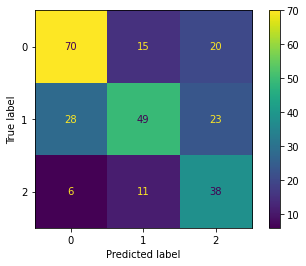

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=nb_model.classes_).plot()

# 2 class NB

In [39]:
happysad = df[df['label'] != 2]

In [137]:
train_df, eval_df = train_test_split(happysad, test_size=0.2)

In [161]:
vectorizer = TfidfVectorizer(ngram_range = (1,5), max_df=.9, min_df=25, strip_accents="unicode", max_features=10000, dtype=np.float32)

X_train = vectorizer.fit_transform(train_df.clean_text)

y_train = train_df.label

nb_model = MultinomialNB(alpha=1.5)

nb_model.fit(X_train,y_train)

nb_model.score(X_train,y_train)

0.8502826096481619

In [162]:
X_val = vectorizer.transform(eval_df.clean_text)

y_val = eval_df.label
nb_model.score(X_val, y_val)

0.8364879074658255

In [44]:
happysad_lyr = lyrics[lyrics['label'] != 'angry']

In [45]:
happysad_lyr

,Unnamed: 0,Unnamed: 0.1,title,artist,label,lyrics
0,0,0,If I Die Young,Naya Rivera,sad,"Text\nIf I die young, bury me in satin\nLay me..."
1,1,1,Angie,The Rolling Stones,sad,"Angie, Angie\nWhen will those clouds all disap..."
2,2,2,Pretty Sad,XYLØ,sad,"[Intro]\n(Feeling pretty sad, pretty, pretty s..."
3,3,3,Tear In Your Hand,Tori Amos,sad,All the world just stopped now_x000D_\nSo you ...
4,4,4,Canvas,Shane Smith & The Saints,sad,"I had a a brother, who wasn't from my family\n..."
...,...,...,...,...,...,...
200,200,200,Dog Days Are Over,Florence + The Machine,happy,[Verse 1]\nHappiness hit her like a train on a...
201,201,201,Good Vibes,Chris Janson,happy,[Verse 1]\nI ain't watching TV today\nBad news...
202,202,202,High Hopes,Panic! At the Disco,happy,"[Intro]\nHigh, high hopes\n[Chorus]\nHad to ha..."
203,203,203,"Hey Look Ma, I Made It",Panic! At the Disco,happy,"[Verse 1]\nAll my life, been hustlin' and\nTon..."


In [163]:
X_test = vectorizer.transform(happysad_lyr['lyrics'].apply(clean).replace('\n', ' '))
y_test = happysad_lyr['label'].map(emotion_dict)
nb_model.score(X_test, y_test)

0.6878048780487804

In [60]:
y_pred = nb_model.predict(X_test)

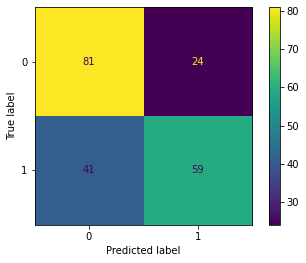

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=nb_model.classes_).plot()

# Logistic Regression -- 2 class - happy or sad

In [177]:
vectorizer = TfidfVectorizer(ngram_range = (1,5), max_df=.9, min_df=25, strip_accents="unicode", max_features=10000, dtype=np.float32)

vectorizer = vectorizer.fit(train_df.clean_text)
X_train = vectorizer.transform(train_df.clean_text)
y_train = train_df.label


In [172]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_train, y_train)

0.8703062699907987

In [173]:
X_val = vectorizer.transform(eval_df.clean_text)
y_val = eval_df.label
lr_model.score(X_val, y_val)

0.8335085874518051

In [174]:
X_test = vectorizer.transform(happysad_lyr['lyrics'].apply(clean).replace('\n', ' '))
y_test = happysad_lyr['label'].map(emotion_dict)
lr_model.score(X_test, y_test)

0.7170731707317073

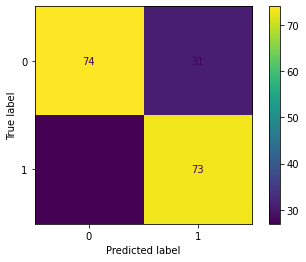

In [176]:
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=lr_model.classes_).plot()

In [186]:
from sklearn.model_selection import GridSearchCV

grid={"C":[0.01, 0.1, 0.5, 1], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='saga', max_iter=300)
logreg_cv2=GridSearchCV(logreg, grid, cv=5, n_jobs=-1)
logreg_cv2.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [187]:
best1 = logreg_cv.best_estimator_

In [198]:
best1

LogisticRegression(C=1.023292992280754, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
logreg_cv.best_score_

0.8490115754790102

In [191]:
grid={"C":[.8, 1, 1.2], 'solver':['saga', 'newton-cg', 'sag', 'lbfgs']}
logreg=LogisticRegression(max_iter=300)
logreg_cv2=GridSearchCV(logreg, grid, cv=5, n_jobs=-1)
logreg_cv2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.8, 1, 1.2],
                         'solver': ['saga', 'newton-cg', 'sag', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [192]:
logreg_cv2.best_estimator_

LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
grid={"l1_ratio":[.2,.5,.8], "C":[1,1.2,1.5]}
logreg=LogisticRegression(max_iter=300, solver="saga", penalty="elasticnet")
logreg_cv2=GridSearchCV(logreg, grid, cv=10, n_jobs=-1)
logreg_cv2.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 1.2, 1.5], 'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
best2 = logreg_cv2.best_estimator_

In [196]:
logreg_cv2.best_score_

0.846864489771788

In [200]:
best2.score(X_val, y_val)

0.8459516298633017

In [201]:
best2.score(X_test, y_test)

0.697560975609756

In [202]:
cv_result=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [204]:
cv_result.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
cv_result.score(X_test, y_test)

0.7170731707317073

In [206]:
test2 = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
test2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
test2.score(X_test, y_test)

0.7170731707317073

In [217]:
best_lr = LogisticRegression(C=2, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
best_lr = test2.fit(X_train, y_train)
best_lr.score(X_test, y_test)

0.7414634146341463

## Logistic Regression  - 3 Classes

In [218]:
train_df, eval_df = train_test_split(df, test_size=0.2)

In [223]:
vectorizer = TfidfVectorizer(ngram_range = (1,5), max_df=.9, min_df=25, strip_accents="unicode", max_features=10000, dtype=np.float32)

vectorizer = vectorizer.fit(train_df.clean_text)
X_train = vectorizer.transform(train_df.clean_text)
y_train = train_df.label
X_val = vectorizer.transform(eval_df.clean_text)
y_val = eval_df.label
X_test = vectorizer.transform(lyrics['lyrics'].apply(clean))
y_test = lyrics['label'].map(emotion_dict)

In [246]:
lr_multi_model = LogisticRegression(C=2, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [247]:
lr_multi_model.fit(X_train, y_train)
lr_multi_model.score(X_train, y_train)

0.8052253736612922

In [248]:
lr_multi_model.score(X_val, y_val)

0.7439096151582911

In [249]:
lr_multi_model.score(X_test, y_test)

0.6230769230769231